In [57]:
# -*- coding:utf-8 -*-
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import keras
import data_process
# import loss_history
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 2
epochs = 10

img_rows, img_cols = 1, 2402

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = data_process.load_data(data_process.series_smooth_file)

#x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
#x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

Successfully load data...
17740 train samples
4435 test samples


Successfully load data...
x_train shape: (17740, 1, 2402)
17740 train samples
4435 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 1, 32)             311680    
_________________________________________________________________
lstm_33 (LSTM)               (None, 1, 32)             8320      
_________________________________________________________________
lstm_34 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
_________________________________________________________________
activation_9 (Activation)    (None, 1)                 0         
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Train on 17740 samples, validate on 4435

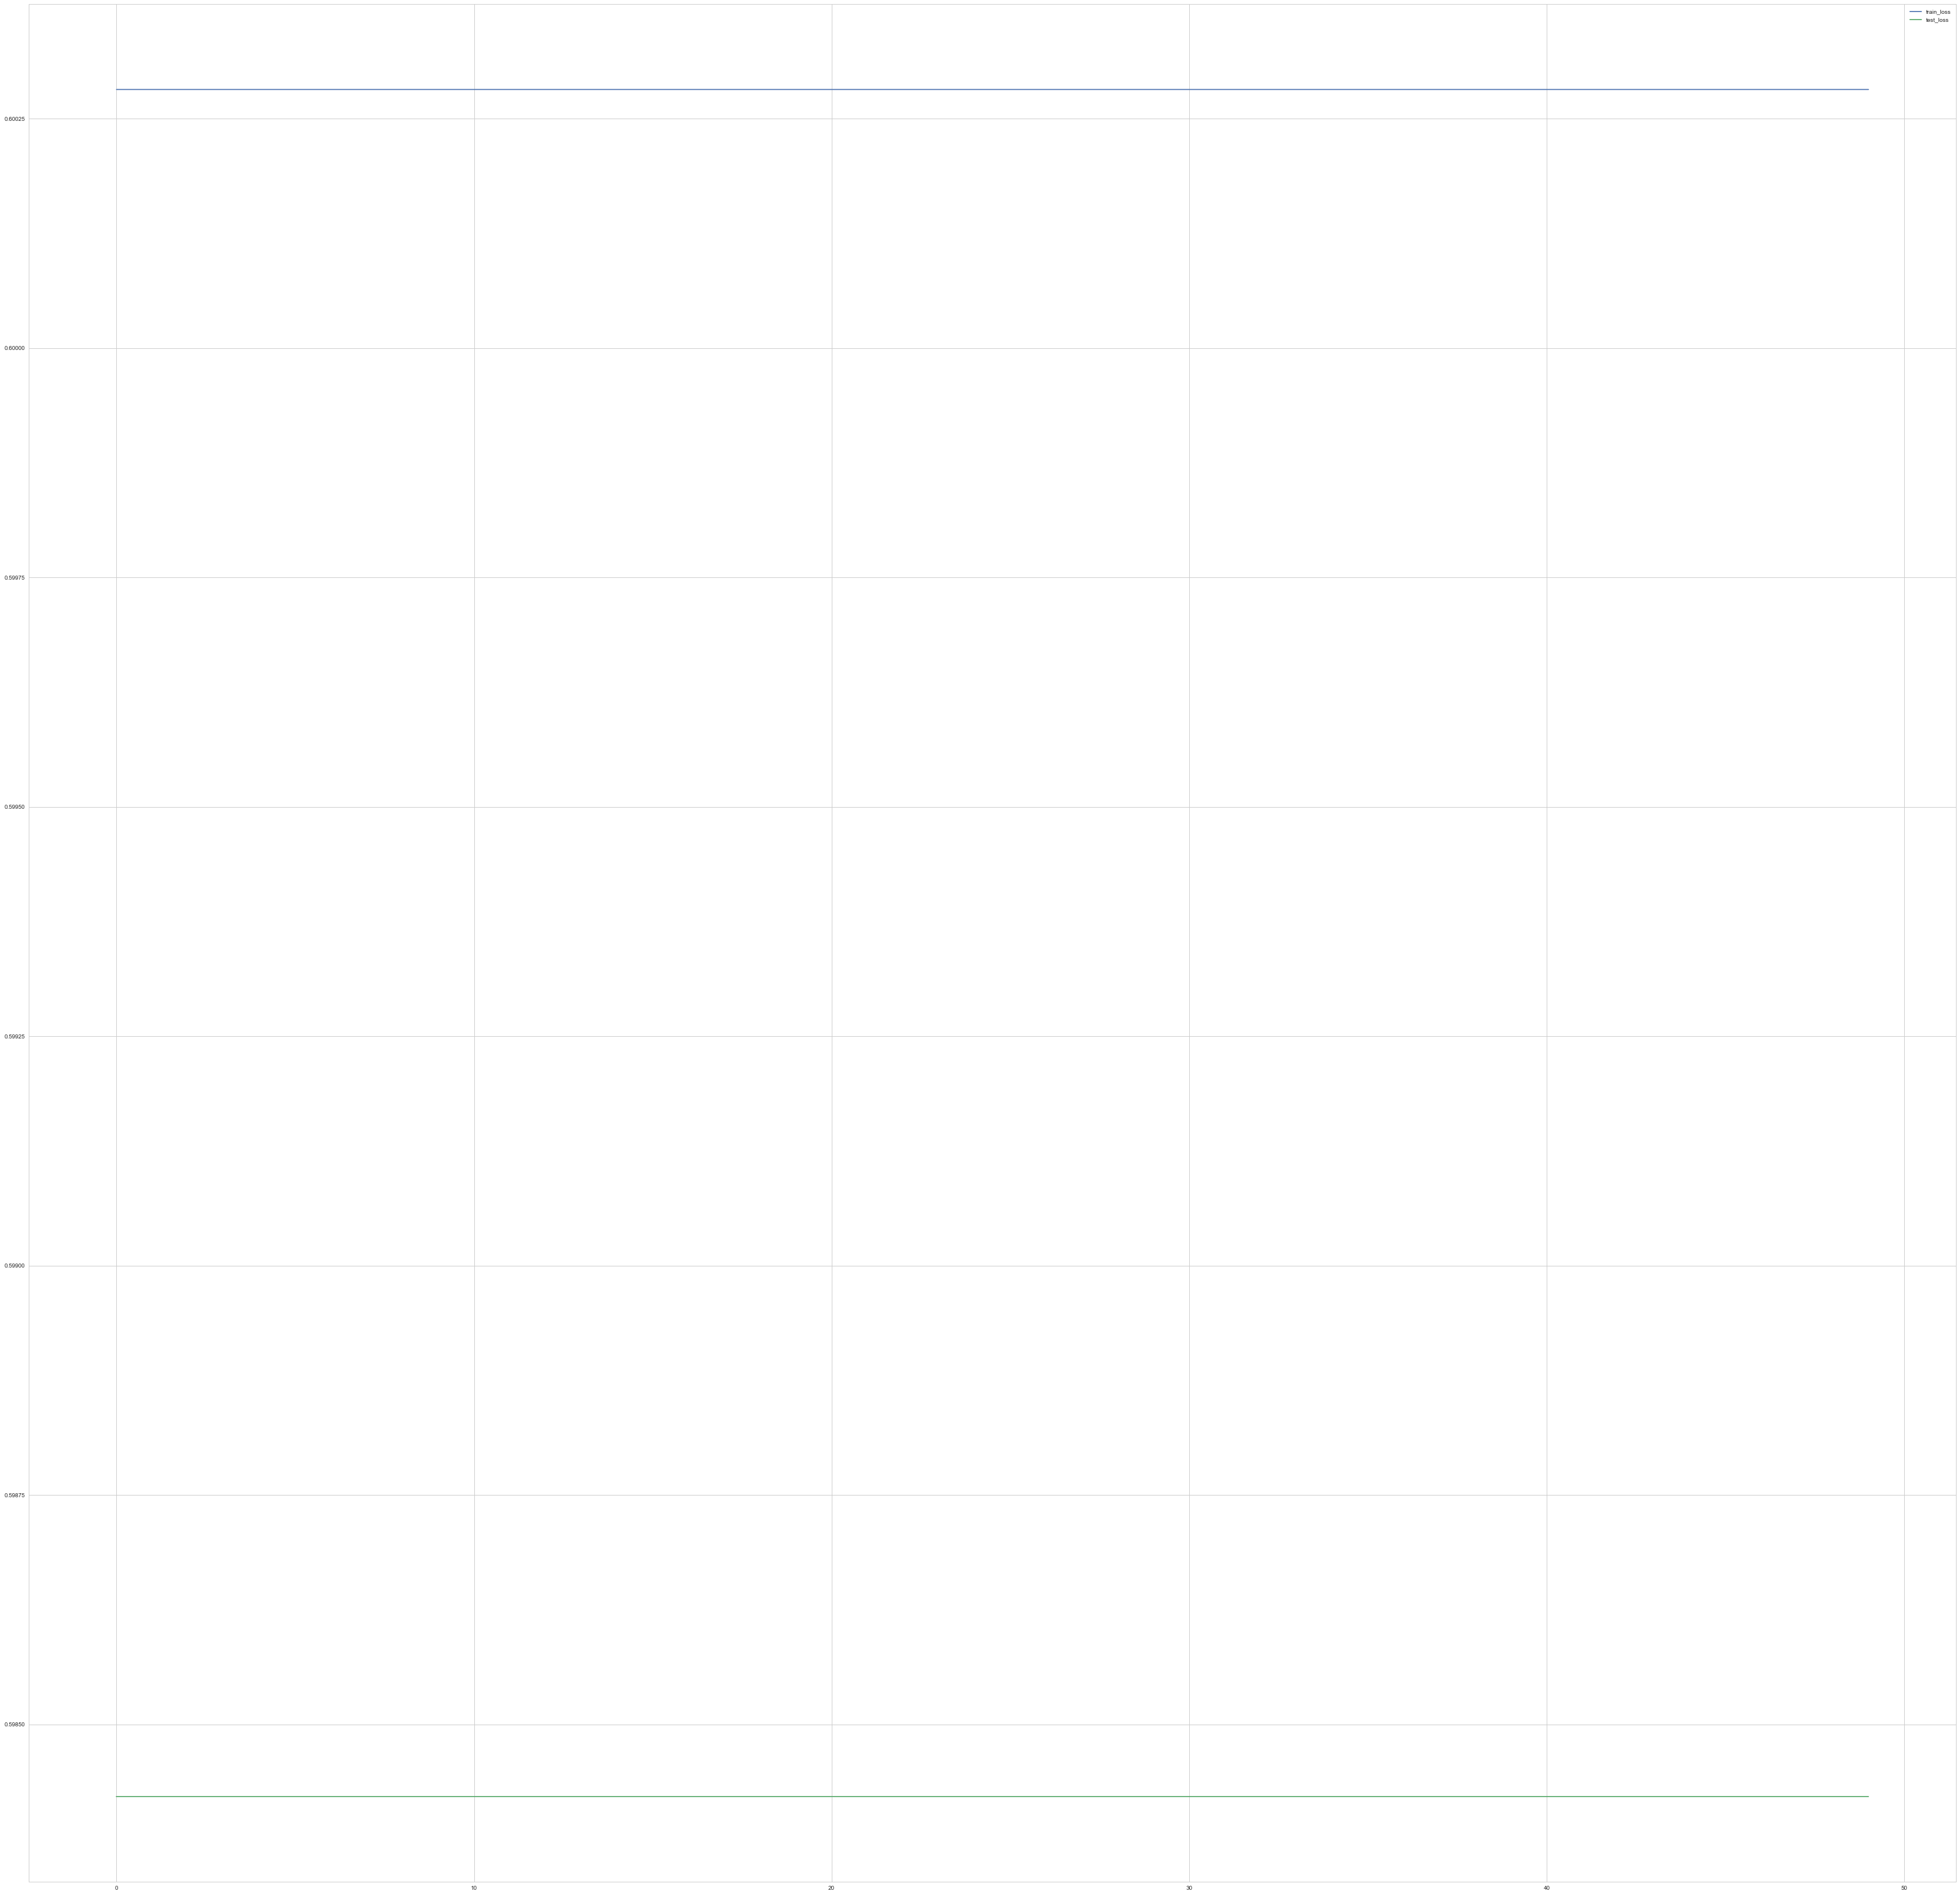

In [60]:
# -*- coding:utf-8 -*-
from __future__ import print_function

from keras.models import Sequential
from keras.layers import Activation, Dense, Embedding
from keras.layers import LSTM
from keras.layers import Dropout
import matplotlib.pyplot as plt
import data_process
import seaborn as sns

(x_train, y_train), (x_test, y_test) = data_process.load_data(data_process.series_smooth_file)

# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

neurons = 32
batch_size = 256
epochs = 50
window_len = 7
output_size = 1
activation_function = 'relu'
dropout = 0.2
loss = 'mean_squared_error'
optimizer='adam'

# model = Sequential()
# model.add(LSTM(256, input_shape=(x_train.shape[1], 100, x_train.shape[2]), return_sequences=False))
# model.add(Dropout(0.2))
# model.add(LSTM(128))
# model.add(Dropout(0.2))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# history = model.fit(x_train, y_train, nb_epoch=50, batch_size=batch_size, verbose=2)

model = Sequential()
model.add(LSTM(neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]), activation=activation_function))
#model.add(Dropout(dropout))
model.add(LSTM(neurons, return_sequences=True, activation=activation_function))
#model.add(Dropout(dropout))
model.add(LSTM(neurons, activation=activation_function))
#model.add(Dropout(dropout))
model.add(Dense(units=output_size))
model.add(Activation('softmax'))
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model.summary()

# fit network
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          shuffle=True,
          validation_data=(x_test, y_test))

print("test set")
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# plot history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.legend()
plt.savefig('../data/figures/' + 'figure2_b.png', bbox_inches='tight', edgecolor='white')
plt.show()

AttributeError: Unknown property font_scale

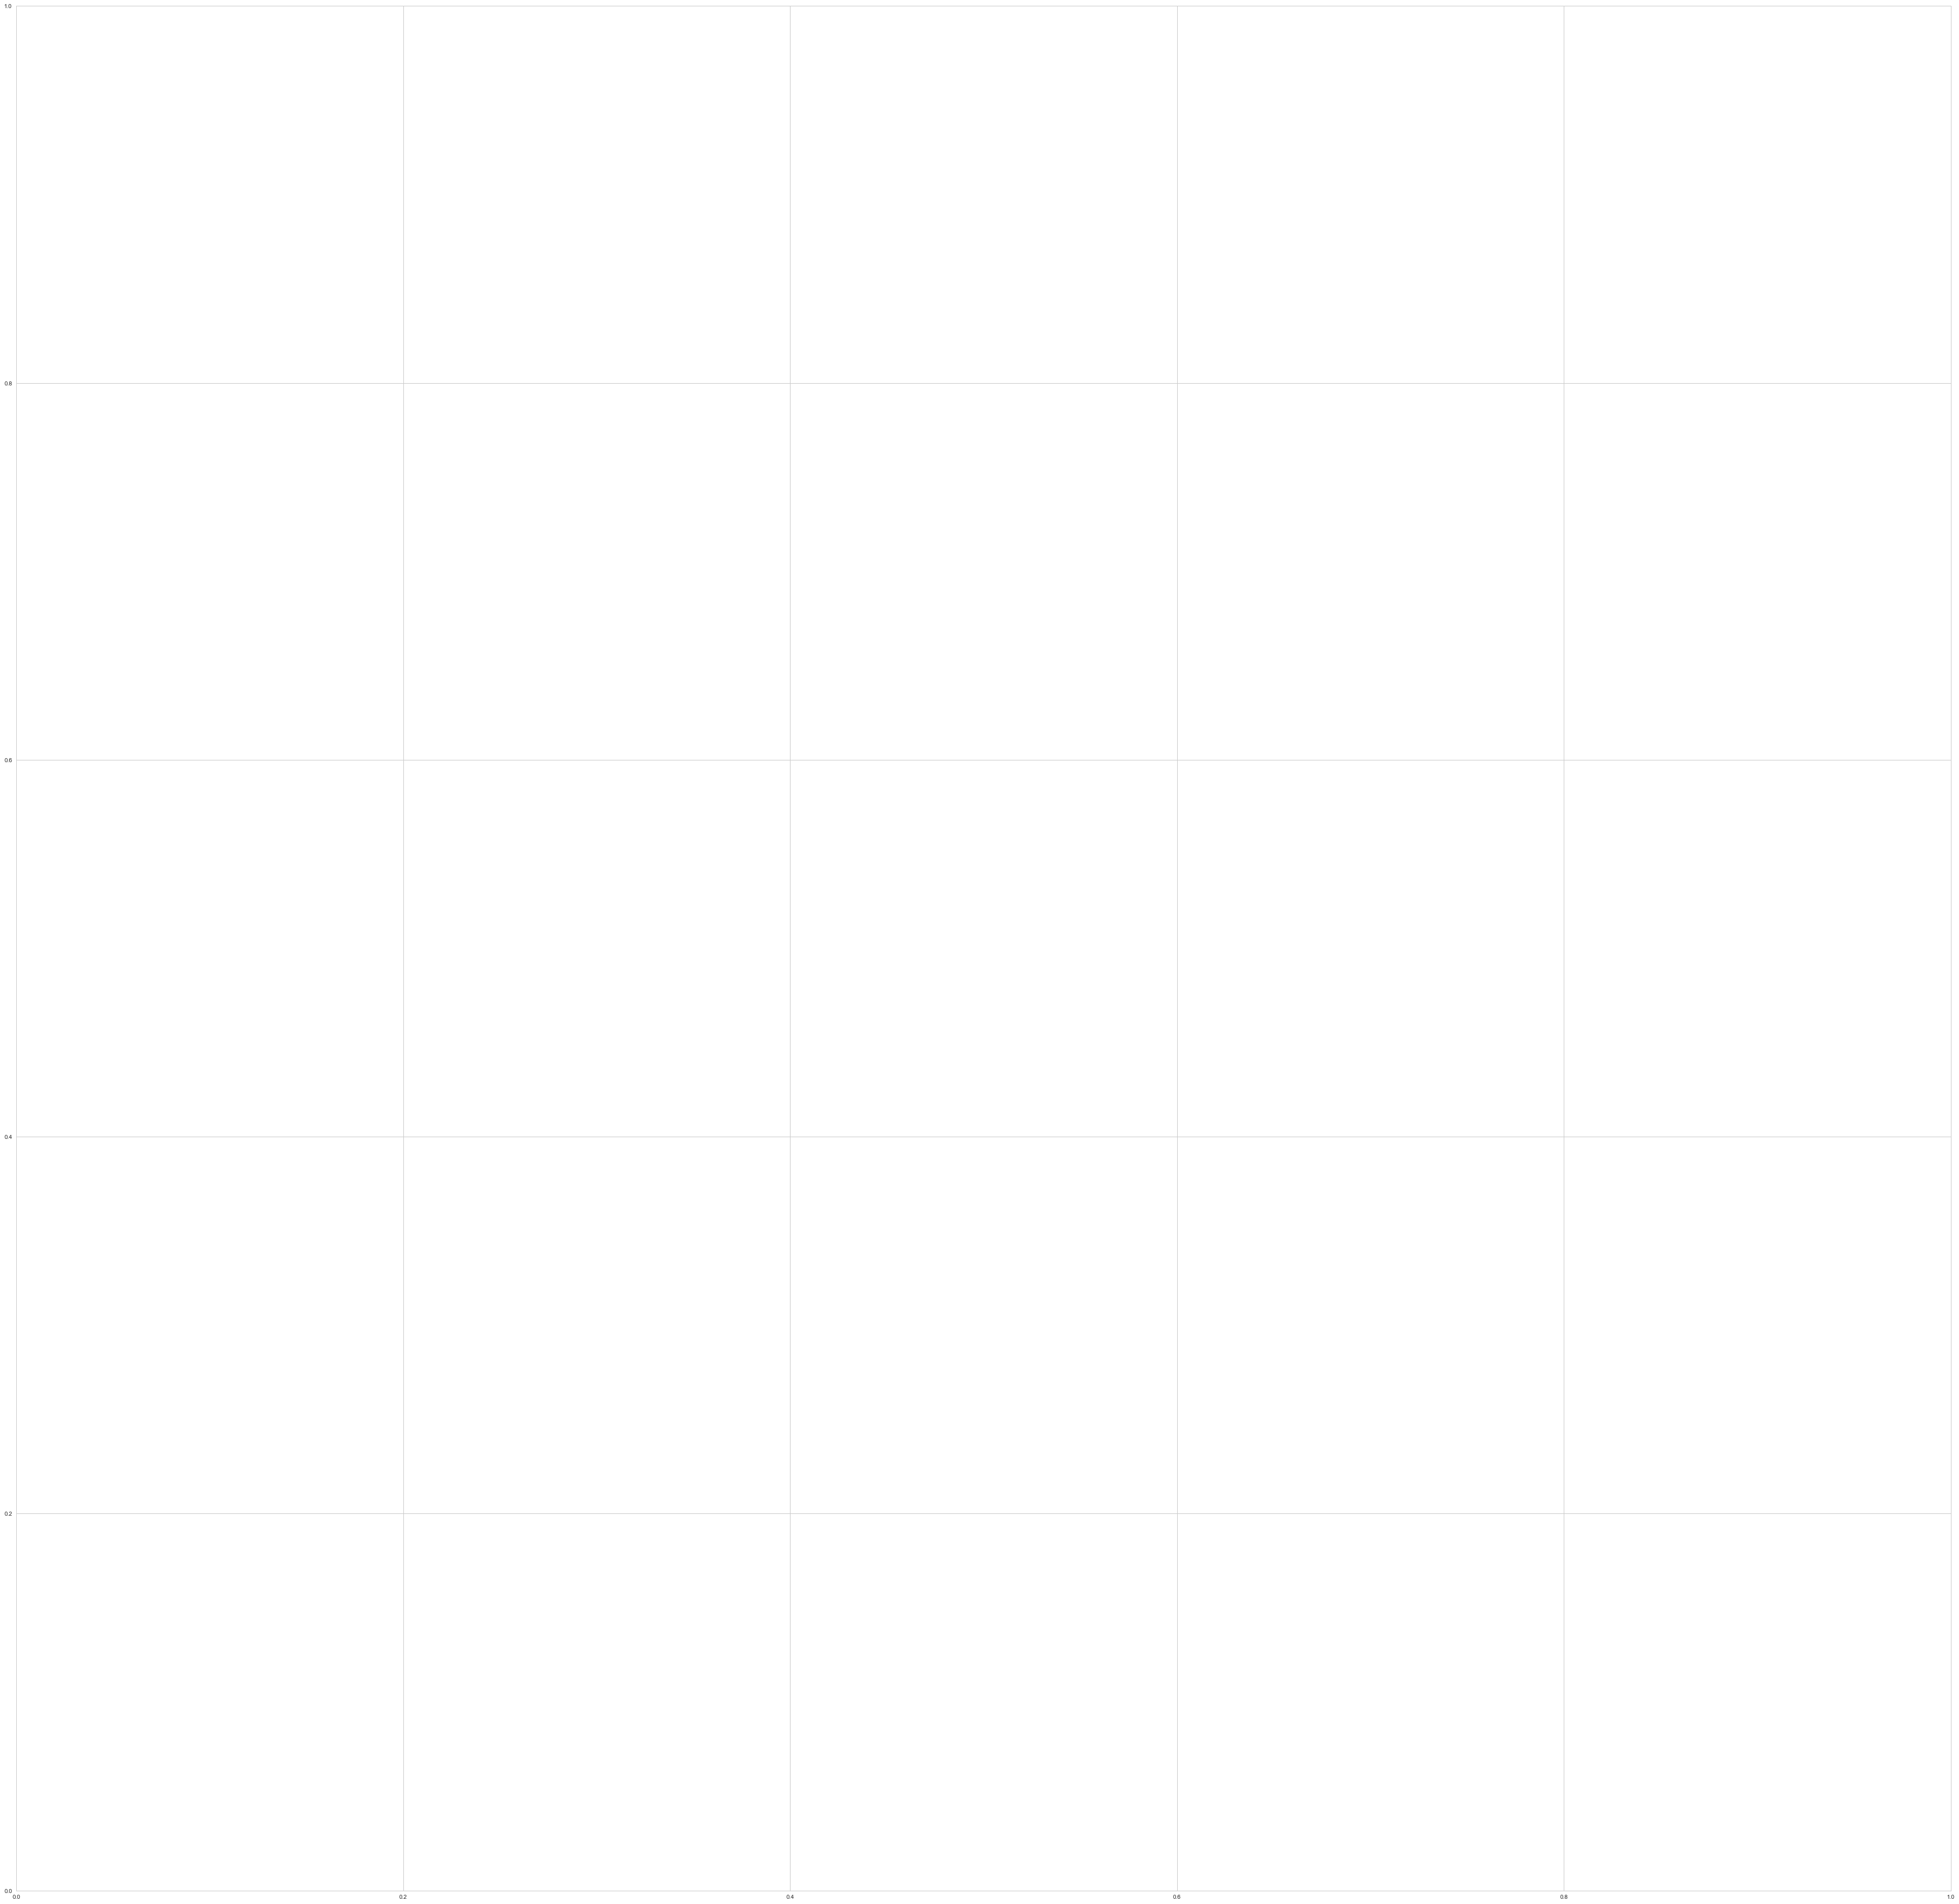

In [61]:
# plot history
plt.plot(history.history['acc'], label='train_acc', font_scale = 4)
plt.plot(history.history['val_acc'], label='test_acc')
plt.legend()
plt.savefig('../data/figures/' + 'figure2_a.png', bbox_inches='tight', edgecolor='white')
plt.show()
plt.close('all')

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.legend()
plt.savefig('../data/figures/' + 'figure2_b.png', bbox_inches='tight', edgecolor='white')
plt.show()

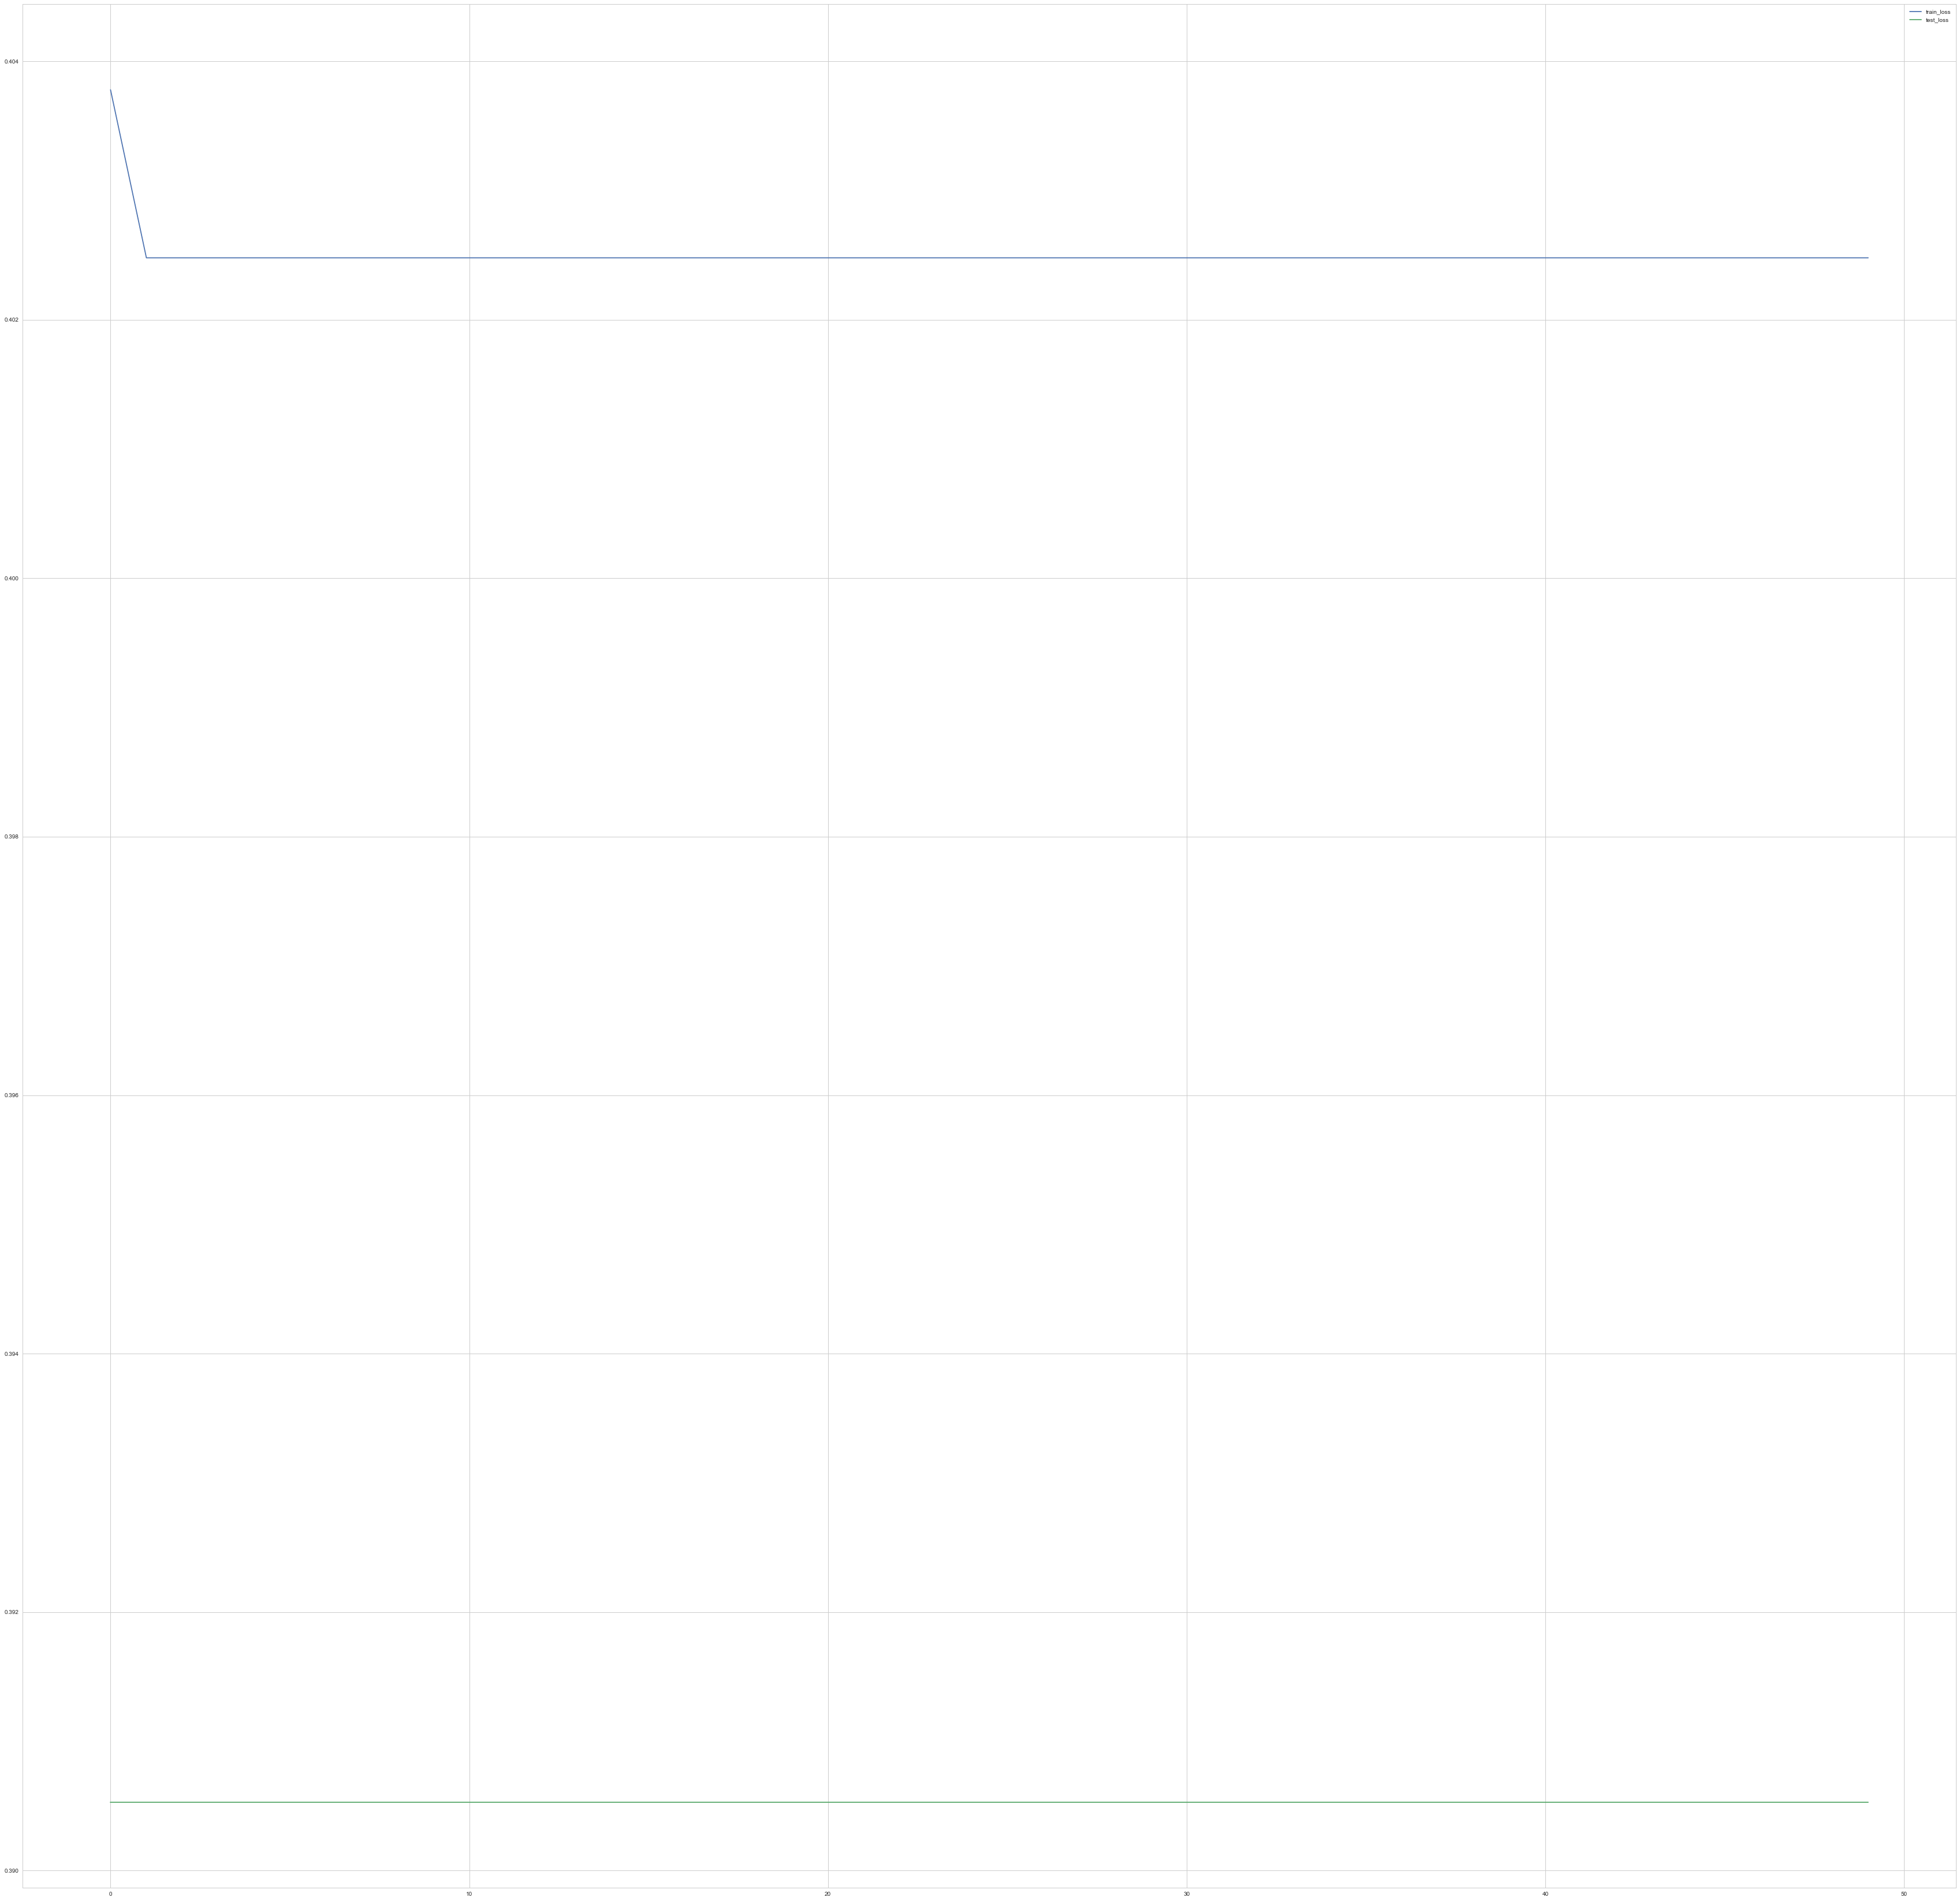

In [55]:
loss_sample = pd.read_csv(data_path + 'data_zero_filter_figure11.csv')

In [44]:
for i in range(0, 50):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-44-72d329b70d7c>, line 1)